<a href="https://colab.research.google.com/github/DanyloVanin/ML_Kaggle_Competitions/blob/main/KMA_ML_Vanin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Initial configuration

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

In [ ]:
DATA_FOLDER = '/content/drive/MyDrive/ML/KMA_Dataset'

train_df = pd.read_csv(DATA_FOLDER+"/train.csv")
test_df = pd.read_csv(DATA_FOLDER+"/test_features.csv")
sample_df = pd.read_csv(DATA_FOLDER+"/sample_submission.csv")

## Data Analysis

In [ ]:
train_df.head()

,Sex,Length,Diameter,Height,weight_1,weight_2,weight_3,weight_4,target
0,M,0.725,0.550,0.200,1.5100,0.8735,0.4265,0.5085,9
1,F,0.415,0.340,0.130,0.3675,0.1460,0.0885,0.1200,10
2,M,0.705,0.555,0.215,2.1410,1.0465,0.3830,0.5280,11
3,I,0.375,0.290,0.095,0.2875,0.1230,0.0605,0.0800,6
4,F,0.680,0.500,0.185,1.7410,0.7665,0.3255,0.4685,12


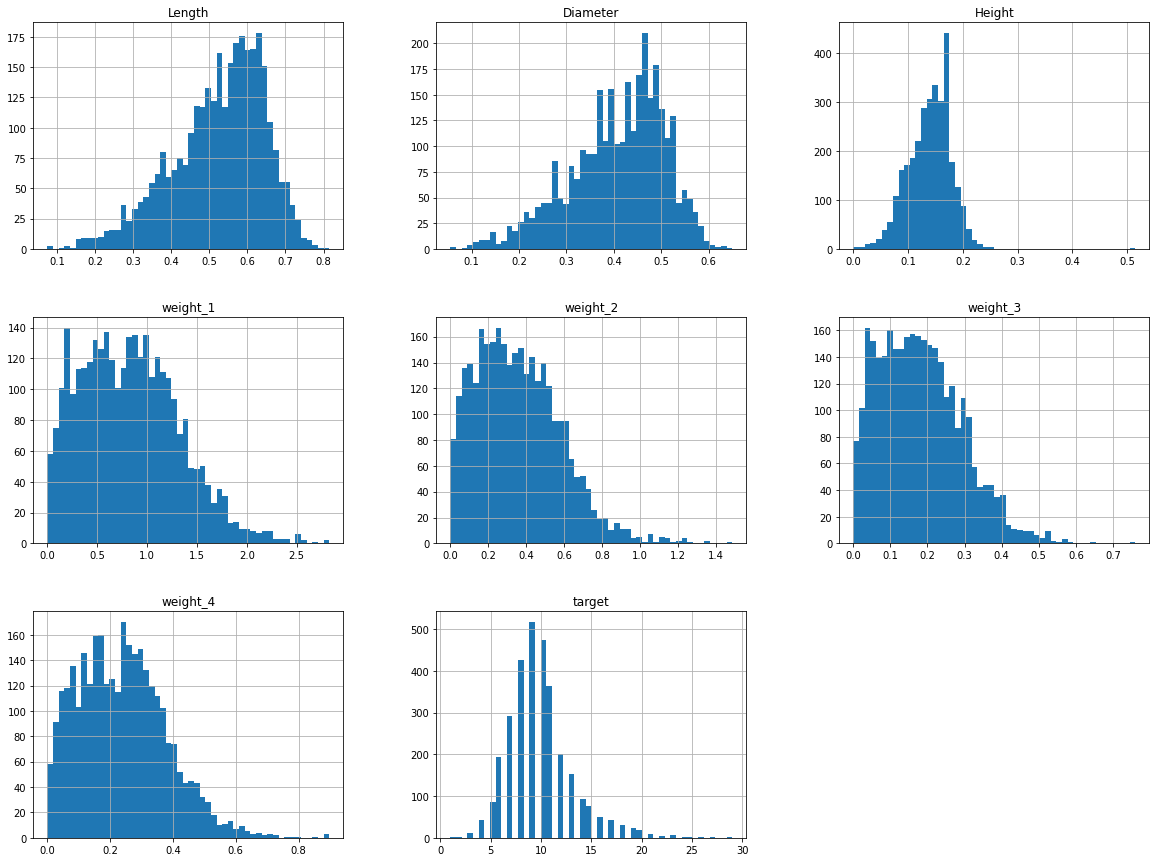

In [ ]:
%matplotlib inline 

import matplotlib.pyplot as plt
train_df.hist(bins=50, figsize=(20,15))
plt.show()

In [ ]:
# No "Null" values
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3136 entries, 0 to 3135
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Sex       3136 non-null   object 
 1   Length    3136 non-null   float64
 2   Diameter  3136 non-null   float64
 3   Height    3136 non-null   float64
 4   weight_1  3136 non-null   float64
 5   weight_2  3136 non-null   float64
 6   weight_3  3136 non-null   float64
 7   weight_4  3136 non-null   float64
 8   target    3136 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 220.6+ KB


In [ ]:
# General info
train_df.describe()

,Length,Diameter,Height,weight_1,weight_2,weight_3,weight_4,target
count,3136.000000,3136.000000,3136.000000,3136.000000,3136.000000,3136.000000,3136.000000,3136.000000
mean,0.524141,0.407868,0.139115,0.829300,0.359130,0.180738,0.239251,9.948023
std,0.120807,0.099984,0.039111,0.492789,0.222860,0.110205,0.139756,3.290532
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.348750,0.115000,0.440500,0.184375,0.092875,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.801000,0.336000,0.171000,0.234500,9.000000
75%,0.615000,0.480000,0.165000,1.156500,0.503625,0.254000,0.330000,11.000000
max,0.815000,0.650000,0.515000,2.825500,1.488000,0.760000,0.897000,29.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe9953b4cd0>,
      dtype=object)

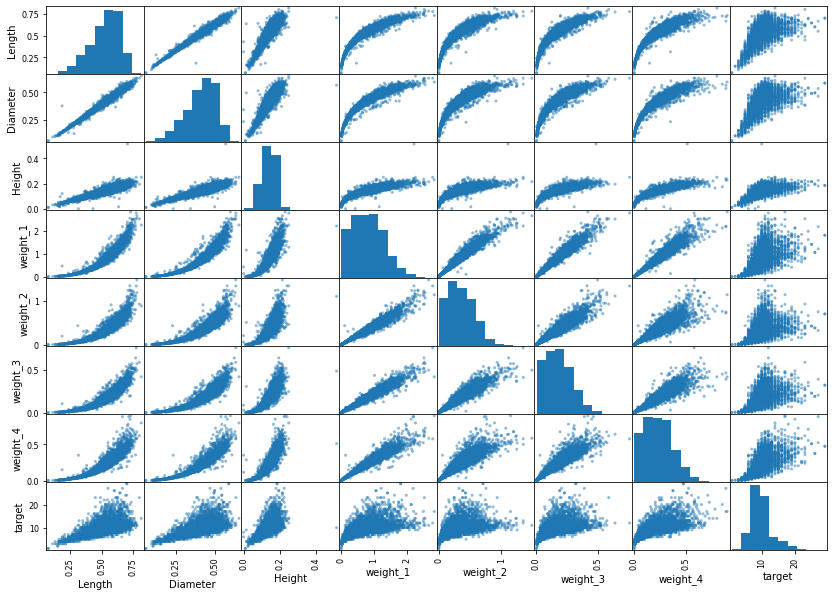

In [ ]:
from pandas.plotting import scatter_matrix

scatter_matrix(train_df, figsize=(14, 10))

In [ ]:
# Playing with correlatio matrix
corr_matrix = train_df.corr()
# corr_matrix['Weight_avg'].sort_values(ascending=False)

# Observations

1. Sex is categorical - should be one-hot encoded
2. Target is also categorical (min=1, max=29)
3. All features - non-negative numbers
4. (histogram) Most of the features histogram are close to normal distribution
5. (scattermatrix) there seems to be some correlations between different features

## Data Pre-proceessing

### One-hot encoding

In [ ]:
from sklearn.neighbors import LocalOutlierFactor

lof = LocalOutlierFactor()
yhat = lof.fit_predict(train_df.drop(['Sex'], axis=1))

# select all rows that are not outliers
mask = yhat != -1

train_df_cleaned = train_df[mask]

# summarize the shape of the updated training dataset
print(train_df.shape, train_df_cleaned.shape)

(3136, 9) (2973, 9)


In [ ]:
train_df_cleaned.head()

,Sex,Length,Diameter,Height,weight_1,weight_2,weight_3,weight_4,target
0,M,0.725,0.55,0.200,1.5100,0.8735,0.4265,0.5085,9
1,F,0.415,0.34,0.130,0.3675,0.1460,0.0885,0.1200,10
3,I,0.375,0.29,0.095,0.2875,0.1230,0.0605,0.0800,6
4,F,0.680,0.50,0.185,1.7410,0.7665,0.3255,0.4685,12
5,I,0.455,0.34,0.115,0.4860,0.2610,0.0655,0.1315,8


In [ ]:
from sklearn.preprocessing import OneHotEncoder

#creating instance of one-hot-encoder
# encoder = OneHotEncoder(handle_unknown='ignore')

def one_hot_encode(df):
  one_hot_df = pd.get_dummies(df['Sex'], prefix="Sex")
  result_df = df.drop(['Sex'], axis=1)
  # encoded_df = pd.DataFrame(encoder.fit_transform(df[['Sex']]).toarray())
  return result_df.join(one_hot_df)


In [ ]:
encoded_train = one_hot_encode(train_df_cleaned)
encoded_test = one_hot_encode(test_df)

In [ ]:
encoded_train.head(3)

,Length,Diameter,Height,weight_1,weight_2,weight_3,weight_4,target,Sex_F,Sex_I,Sex_M
0,0.725,0.55,0.200,1.5100,0.8735,0.4265,0.5085,9,0,0,1
1,0.415,0.34,0.130,0.3675,0.1460,0.0885,0.1200,10,1,0,0
3,0.375,0.29,0.095,0.2875,0.1230,0.0605,0.0800,6,0,1,0


### Dropping unused columns

In [ ]:
# Dropping unused columns

X_df = encoded_train.drop(['target'], axis=1)
X_test_df = encoded_test
y_df = encoded_train['target']


In [ ]:
# Feature engineering

# final_df['AvgWeight']=(final_df['weight_1']+final_df['weight_2']+final_df['weight_3']+final_df['weight_4'])/4
# final_df['Volume']=final_df['Length']*final_df['Diameter']*final_df['Height']

# final_pred['AvgWeight']=(final_pred['weight_1']+final_pred['weight_2']+final_pred['weight_3']+final_pred['weight_4'])/4
# final_pred['Volume']=final_pred['Length']*final_pred['Diameter']*final_pred['Height']

In [ ]:
# Normalization
# See: https://towardsdatascience.com/scale-standardize-or-normalize-with-scikit-learn-6ccc7d176a02

from sklearn.preprocessing import RobustScaler
columns_to_normalize = ['Length', 'Height', 'Diameter', 'weight_1', 'weight_2', 'weight_3', 'weight_4']

robust_scaler = RobustScaler()
robust_scaler.fit(X_df[columns_to_normalize])

X_df[columns_to_normalize] = robust_scaler.transform(X_df[columns_to_normalize])
X_test_df[columns_to_normalize] = robust_scaler.transform(X_test_df[columns_to_normalize])

In [ ]:
X_df

,Length,Diameter,Height,weight_1,weight_2,weight_3,weight_4,Sex_F,Sex_I,Sex_M
0,1.12500,0.961538,1.2,1.029582,1.750000,1.663430,1.417526,0,0,1
1,-0.81250,-0.653846,-0.2,-0.619048,-0.612013,-0.524272,-0.585052,1,0,0
3,-1.06250,-1.038462,-0.9,-0.734488,-0.686688,-0.705502,-0.791237,0,1,0
4,0.84375,0.576923,0.9,1.362915,1.402597,1.009709,1.211340,1,0,0
5,-0.56250,-0.653846,-0.5,-0.448052,-0.238636,-0.673139,-0.525773,0,1,0
...,...,...,...,...,...,...,...,...,...,...
3130,0.15625,0.038462,0.4,0.020924,0.172078,-0.067961,-0.025773,1,0,0
3131,0.18750,0.423077,0.5,0.406205,0.573052,0.258900,0.373711,1,0,0
3132,0.25000,0.230769,-0.3,0.332612,0.183442,0.275081,0.085052,0,0,1
3134,-0.81250,-0.923077,-0.8,-0.680375,-0.579545,-0.770227,-0.734536,0,0,1


In [ ]:
from sklearn.preprocessing import PolynomialFeatures

# perform a polynomial features transform of the dataset
trans = PolynomialFeatures(degree=3)
trans.fit(X_df)
X_df = trans.transform(X_df)
X_test_df = trans.transform(X_test_df)

In [ ]:
# Convert to values
X = X_df
X_test = X_test_df
y = y_df.values

In [ ]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest=train_test_split(X, y, test_size=0.2)

# TensorFlow Classifier

In [ ]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

In [ ]:
import numpy as np

from scipy.stats import uniform, randint

from sklearn.datasets import load_breast_cancer, load_diabetes, load_wine
from sklearn.metrics import auc, accuracy_score, confusion_matrix, mean_squared_error
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, RandomizedSearchCV, train_test_split

import xgboost as xgb
import tensorflow as tf

In [ ]:
# Create feature normalizer
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(xtrain))
first = np.array(xtrain[:1])

with np.printoptions(precision=2, suppress=True):
  print('First example:', first)
  print()
  print('Normalized:', normalizer(first).numpy())

First example: [[1.   0.09 0.04 0.1  0.15 0.18 0.41 0.06 1.   0.   0.   0.01 0.   0.01
  0.01 0.02 0.04 0.01 0.09 0.   0.   0.   0.   0.01 0.01 0.02 0.   0.04
  0.   0.   0.01 0.01 0.02 0.04 0.01 0.1  0.   0.   0.02 0.03 0.06 0.01
  0.15 0.   0.   0.03 0.07 0.01 0.18 0.   0.   0.17 0.02 0.41 0.   0.
  0.   0.06 0.   0.   1.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.01 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.01 0.   0.   0.   0.   0.01 0.   0.01
  0.   0.   0.   0.01 0.   0.02 0.   0.   0.02 0.   0.04 0.   0.   0.
  0.01 0.   0.   0.09 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.01 0.   0.   0.   0.   0.   0.01 0.   0.   0.01 0.   0.02
  0.   0.   0.   0.   0.   0.   0.04 0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.01 0.   0.   0.   0.   0.01 0.   0.01 0.   0.   0.
  0.01 0.   0.02 0.   0.   0.02 0.   0.04 0.   0.   0.   0.01 0. 

In [ ]:
import tensorflow as tf

#set random seed
tf.random.set_seed(42)

#create the model
base_regression_model=tf.keras.Sequential([
    normalizer,
    tf.keras.layers.Dense(64,activation="relu", kernel_regularizer=tf.keras.regularizers.l1_l2(l1=0.01, l2=0.01)),
    tf.keras.layers.Dense(16,activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Dense(32,activation="relu", kernel_regularizer=tf.keras.regularizers.l1_l2(l1=0.01, l2=0.01)),
    tf.keras.layers.Dense(1, activation="linear")
])

#compile the model
base_regression_model.compile(
   loss="mse",
   optimizer=tf.keras.optimizers.Adam(0.0001),
   metrics="mse")

#fit the model
base_regression_model_history =base_regression_model.fit(
   xtrain,
   ytrain,
   epochs=100,
   validation_data=(xtest,ytest))

Epoch 1/100
75/75 [==============================] - 1s 6ms/step - loss: 114.9348 - mse: 100.9053 - val_loss: 102.6551 - val_mse: 88.7315
Epoch 2/100
75/75 [==============================] - 0s 4ms/step - loss: 88.4009 - mse: 74.5620 - val_loss: 69.5301 - val_mse: 55.7709
Epoch 3/100
75/75 [==============================] - 0s 3ms/step - loss: 53.8214 - mse: 40.1281 - val_loss: 37.8293 - val_mse: 24.2028
Epoch 4/100
75/75 [==============================] - 0s 4ms/step - loss: 30.7972 - mse: 17.2422 - val_loss: 24.9566 - val_mse: 11.4818
Epoch 5/100
75/75 [==============================] - 0s 4ms/step - loss: 23.8071 - mse: 10.4245 - val_loss: 22.0612 - val_mse: 8.7807
Epoch 6/100
75/75 [==============================] - 0s 4ms/step - loss: 21.6476 - mse: 8.4681 - val_loss: 20.4865 - val_mse: 7.4130
Epoch 7/100
75/75 [==============================] - 0s 3ms/step - loss: 20.3564 - mse: 7.3836 - val_loss: 19.5279 - val_mse: 6.6621
Epoch 8/100
75/75 [==============================] - 0s 3

In [ ]:
# Plot history
def plot_history(history, since_epoch=500, to_epoch=1200):
  plt.plot(history['mse'][since_epoch:to_epoch])
  plt.plot(history['val_mse'][since_epoch:to_epoch])
  plt.title('model mse')
  plt.ylabel('mse')
  plt.xlabel('epoch')
  plt.legend(['train', 'val'], loc='upper left')
  plt.show()

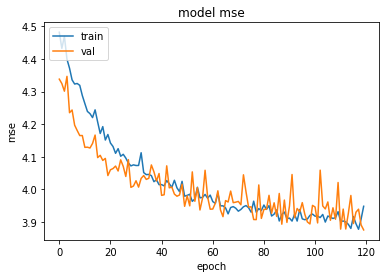

In [ ]:
plot_history(base_regression_model_history.history, 30, 150)

## Result prediction

In [ ]:
y_test = base_regression_model.predict(X_test)

33/33 [==============================] - 0s 2ms/step


In [ ]:
result_dataset = pd.read_csv(DATA_FOLDER+"/sample_submission.csv")
result_dataset['target']= y_test
result_dataset.to_csv('result_dataset_next.csv', index=False)

rounded_result = result_dataset.round({'target': 0})
rounded_result.to_csv('rounded_result_dataset_next.csv', index=False)